<style>
.text_cell_render {font-family: Times New Roman, serif;}
</style>

## Binomial distribution

We say that $X$ is a <mark>binomial random variable</mark> with parameters $n$ and $p$, for short $X\sim B(n,p)$, if

$$X\ \ =\ \ \sum^n_{i=1}X_i$$

where the $X_i$ are independent Bernoulli random variables with success probability $p$. So, $X$ counts the number of successes in a sequence of $n$ independent Bernoulli trials with success probability $p$. Clearly $X\in\{0,\dots,n\}$.

Equivalently, we may also say that $X$ has a <mark>binomial distribution</mark> with parameters $n$ and $p$. In fact random variables are characterized by their distribution a.k.a. <mark>probability mass function</mark> (abbreviated <mark>pmf</mark>). The pmf of of a binomial random variable is not difficult to compute. For $x\in\{0,\dots,n\}$ we have

$${\rm Pr}\,(X=x)\ \ =\ \ {n\choose x}p^x(1-p)^{n-x}$$

Consequently, the <mark>cumulative distribution function</mark> (abbreviated <mark>cdf</mark>) is

$${\rm Pr}\,(X\le x)\ \ =\ \ \sum^x_{i=0}{n\choose i}p^i(1-p)^{n-i}$$

Below we plot the probability mass function $P(X=x)$ for various values of $n$ and $p$. 

In [8]:
## libraries for numerical and statistical functions
from scipy.stats import binom, norm
from numpy import arange
from pandas import * # Never do this in production

## Import graphic library and set graphic parameters
from altair import * # Never do this in a production environment
renderers.enable('notebook')
palette=['olive','darkcyan','darkviolet','darkgreen','firebrick','darkgreen','darkviolet','darkcyan','olive']

## Set parameters and create a DataFrame containing the pmf of B(n,q) for q in p
n = 20                   # number of trials
p = arange(0.1,0.99,0.1) # array of probabilities of success
x = arange(n+1)          # array of number of successes
pmf = DataFrame({})
for q in list(p):
    pmf = pmf.append(DataFrame({'successes': x, 
                                'probability': binom.pmf(x,n,q),
                                'p': q,
                               })
                     )
# Set the click behaviour
click = selection_multi(fields=['p'], 
                        toggle=True, 
                        empty='none', 
                        on='click',
                        )
## Construct the first chart
pmf_plot = Chart()
pmf_plot = pmf_plot.properties(width=550,
                               height= 200,
                              )
pmf_plot = pmf_plot.encode(x=X('successes:Q', 
                               axis=Axis(title='number of successes in {} trials'.format(n),
                                         grid=False,
                                         ),                  
                               ), 
                           y=Y('probability:Q',
                                axis=Axis(title='probability'),
                                stack=None,
                              ),
                           color=Color('p',
                                       scale=Scale(range=palette),
                                       legend=None,
                                      ),
                           opacity=value(0.5)
                           )                                                    
pmf_plo_ = pmf_plot.mark_bar(size=0 ) # phantom graph to stabilize the axis size  
pmf_plot = pmf_plot.mark_bar(size=20) # initialization the actual graph
pmf_plot = pmf_plot.transform_filter(click)

## The second Chart serves as menu of success propabilities
bottom = Chart()
bottom = bottom.mark_bar(size=50)
bottom = bottom.properties(width=550,
                           height= 60,
                           selection=click,
                           )
bottom = bottom.encode(x=X('p:Q',
                           axis=Axis(title='probability of successs (in a simgle trial)',
                                     grid=False,
#                                      scale=Scale(domain=[0.1,0.9])
                                     ),
                            ),
                        y=Y('p:Q',
                            axis=Axis(title='',
                                      values=[],
                                      ),
                            ),

                        color=Color('p',
                                    scale=Scale(range=palette),
                                    legend=None,
                                    ),   
                        opacity=condition(click, value(0.07), value(0.01)),
                        )
## Put the two charts one obove the other
final = vconcat(pmf_plot+pmf_plo_,
        bottom,
        data=pmf,
        )
# final.save('final.svg')

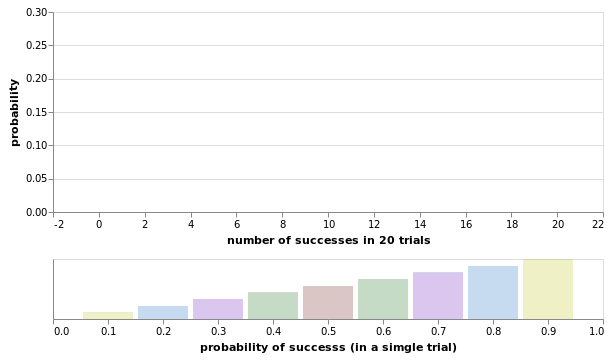

In [9]:
final